In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [8]:
df = pd.DataFrame(iris.data, columns=['slength', 'swidth', 'plength', 'pwidth'])
df.head()

,slength,swidth,plength,pwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
slength    150 non-null float64
swidth     150 non-null float64
plength    150 non-null float64
pwidth     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [10]:
df.describe()

,slength,swidth,plength,pwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
actual = pd.DataFrame(iris.target, columns=["class"])
actual.head()

,class
0,0
1,0
2,0
3,0
4,0


In [12]:
actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
class    150 non-null int32
dtypes: int32(1)
memory usage: 680.0 bytes


In [13]:
actual.describe()

,class
count,150.000000
mean,1.000000
std,0.819232
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


Text(0, 0.5, 'Class')

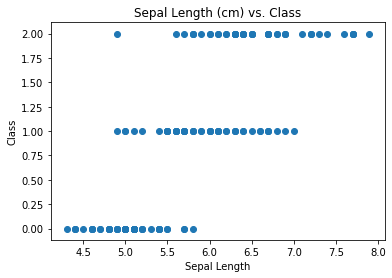

In [14]:
sepal_length = df['slength']
plt.scatter(sepal_length, actual)
plt.title("Sepal Length (cm) vs. Class")
plt.xlabel("Sepal Length")
plt.ylabel("Class")

Text(0, 0.5, 'Class')

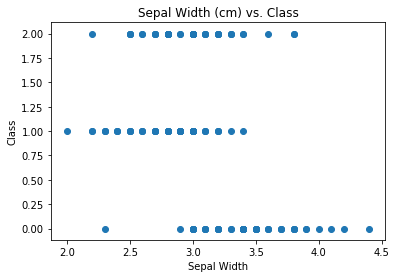

In [15]:
sepal_width = df['swidth']
plt.scatter(sepal_width, actual)
plt.title("Sepal Width (cm) vs. Class")
plt.xlabel("Sepal Width")
plt.ylabel("Class")

Text(0, 0.5, 'Class')

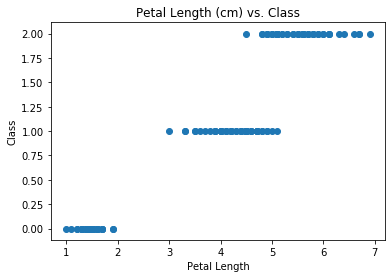

In [16]:
petal_length = df['plength']
plt.scatter(petal_length, actual)
plt.title("Petal Length (cm) vs. Class")
plt.xlabel("Petal Length")
plt.ylabel("Class")

Text(0, 0.5, 'Class')

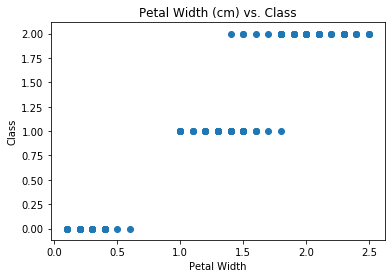

In [17]:
petal_wisth = df['pwidth']
plt.scatter(petal_wisth, actual)
plt.title("Petal Width (cm) vs. Class")
plt.xlabel("Petal Width")
plt.ylabel("Class")

In [18]:
from sklearn.model_selection import train_test_split
y = actual['class'] # was getting some dimension error when passing actual directly

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=0)

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [21]:
model = SVC(gamma='auto')

In [22]:
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [23]:
confusion_matrix(y_test, predict)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [24]:
model.score(X_test, y_test)

1.0

### The support vector classification from sklearn correctly classified every data point in the test set

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter = 10000)
lr.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
print(lr.coef_)

[[-0.39424436  0.84873213 -2.36101925 -1.01268126]
 [ 0.4103113  -0.31741144 -0.14609775 -0.7875501 ]
 [-0.01606694 -0.53132069  2.507117    1.80023136]]


In [28]:
lr_predict = lr.predict(X_test)

In [29]:
confusion_matrix(y_test, lr_predict)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [30]:
lr.score(X_test, y_test)

1.0

### Logistic Regression also correctly predicts all classes

## Now to test models better, will use cross validation

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
print(cross_val_score(lr, df, y.values.ravel(), cv=5))

[0.96666667 1.         0.93333333 0.96666667 1.        ]


In [33]:
print(np.mean(cross_val_score(lr, df, y.values.ravel(), cv=5)))

0.9733333333333334


### Logistic Regression model had 97.3% accuracy in cross validation

In [34]:
print(cross_val_score(model, df, y.values.ravel(), cv=5))

[0.96666667 1.         0.96666667 0.96666667 1.        ]


In [35]:
print(np.mean(cross_val_score(model, df, y.values.ravel(), cv=5)))

0.9800000000000001


### Support Vector Classification has 98.0% accuracy in cross validation

## Found this online. Gives random seedings to shuffle with to cross_val_score so you can check it with n differently shuffled data sets

In [36]:
from sklearn.model_selection import StratifiedKFold

### Trying it on logistic regression model

In [37]:
scores = np.empty([10])
for n in range(10):
     strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=n)
     print(cross_val_score(lr, X_train, y_train, cv=strat_k_fold))
     scores[n] = np.mean(cross_val_score(lr, df, y.values.ravel(), cv=strat_k_fold))
     print(scores[n])
print("Average score accross 10 runs: " + str(np.mean(scores)))

[0.96       0.96       1.         0.95833333 0.95454545]
0.9733333333333334
[1.         0.92       0.95833333 1.         0.95454545]
0.9666666666666666
[0.92       0.96       1.         0.91666667 1.        ]
0.9600000000000002
[0.92       0.96       0.95833333 1.         0.95454545]
0.96
[0.92       1.         1.         0.95833333 0.95454545]
0.9666666666666668
[0.92       0.92       1.         1.         0.95454545]
0.9533333333333334
[0.96       0.92       1.         0.95833333 1.        ]
0.9666666666666666
[0.96       0.96       0.91666667 0.95833333 1.        ]
0.96
[1.         0.84       0.91666667 0.95833333 1.        ]
0.9666666666666666
[0.96       1.         0.95833333 0.91666667 0.90909091]
0.9666666666666666
Average score accross 10 runs: 0.9640000000000001


### Trying it on support vector classification

In [38]:
scores = np.empty([10])
for n in range(10):
     strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=n)
     print(cross_val_score(model, X_train, y_train, cv=strat_k_fold))
     scores[n] = np.mean(cross_val_score(model, df, y.values.ravel(), cv=strat_k_fold))
     print(scores[n])
print("Average score accross 10 runs: " + str(np.mean(scores)))

[0.92       0.96       1.         0.95833333 0.95454545]
0.9800000000000001
[0.96       0.92       0.95833333 1.         0.95454545]
0.9666666666666666
[0.92       0.96       1.         0.91666667 1.        ]
0.9866666666666667
[0.92       1.         0.91666667 0.95833333 0.95454545]
0.9800000000000001
[0.92       1.         1.         0.95833333 0.95454545]
0.9733333333333334
[0.96       0.92       1.         1.         0.95454545]
0.9666666666666668
[0.96       0.92       1.         0.95833333 1.        ]
0.9733333333333334
[0.96       1.         0.91666667 0.91666667 1.        ]
0.9733333333333334
[1.         0.88       1.         0.95833333 1.        ]
0.9800000000000001
[0.96       1.         0.91666667 0.91666667 1.        ]
0.9733333333333334
Average score accross 10 runs: 0.9753333333333334


In [718]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [719]:
df.isna().sum()

slength    0
swidth     0
plength    0
pwidth     0
dtype: int64

In [720]:
data = df.copy()
data['class'] = actual.copy()['class'] # combining input and output into one table
train_data = data.sample(frac=0.8, random_state=0)
test_data = data.drop(train_data.index)

In [721]:
# this can be done more efficiently (without copying) by using pop. I'm only doing
# it this way because if you run this box twice in a row when you use pop it causes
# an error which makes it hard to modify things
train_labels = train_data.copy()['class']
test_labels = test_data.copy()['class']

In [722]:
train_data = train_data.drop('class', axis=1)
test_data = test_data.drop('class', axis=1)

In [723]:
norm_test_data = (test_data - test_data.describe().transpose()['mean']) / test_data.describe().transpose()['std']
norm_train_data = (train_data - train_data.describe().transpose()['mean']) / train_data.describe().transpose()['std']

In [724]:
def build_model():
    model = keras.Sequential([
        layers.Dense(5, activation='tanh', input_shape=[len(norm_train_data.keys())]),
        #layers.Dense(1024, activation='tanh'),
        #layers.Dense(1024, activation='relu'),
        layers.Dense(3, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [725]:
nn_model = build_model()

In [726]:
nn_model.summary()

Model: "sequential_256"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_763 (Dense)            (None, 5)                 25        
_________________________________________________________________
dense_764 (Dense)            (None, 3)                 18        
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [727]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 350

history = nn_model.fit(
    #norm_train_data, train_labels,
    train_data, train_labels,
    epochs=EPOCHS, validation_split=0.2, verbose=0,
    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
..................................................

In [728]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
345,0.257721,0.96875,0.197201,1.0,345
346,0.256996,0.96875,0.196287,1.0,346
347,0.256213,0.96875,0.195254,1.0,347
348,0.255526,0.96875,0.195003,1.0,348
349,0.254933,0.96875,0.193997,1.0,349


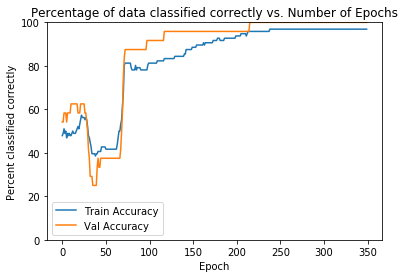

In [729]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.title('Percentage of data classified correctly vs. Number of Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Percent classified correctly')
    plt.plot(hist['epoch'], hist['accuracy']*100,
            label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy']*100,
            label='Val Accuracy')
    plt.ylim([0,100])
    plt.legend()
    
plot_history(history)    

In [730]:
#predictions = nn_model.predict(norm_test_data)
predictions = nn_model.predict(test_data)

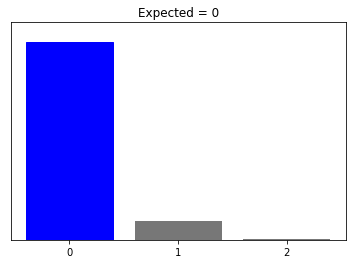

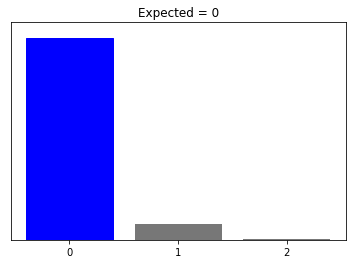

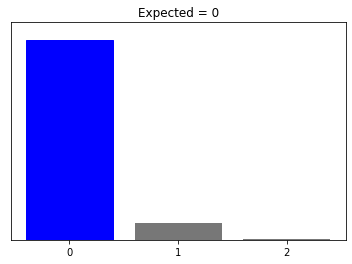

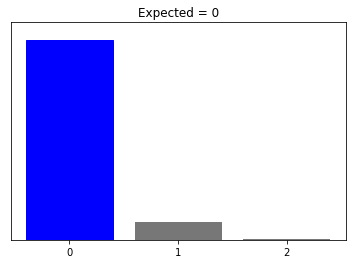

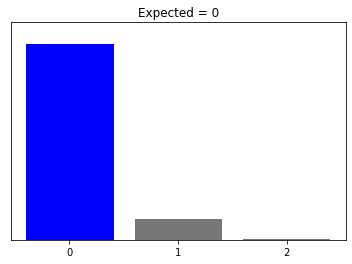

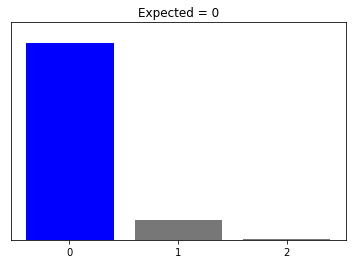

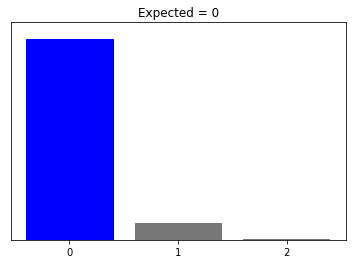

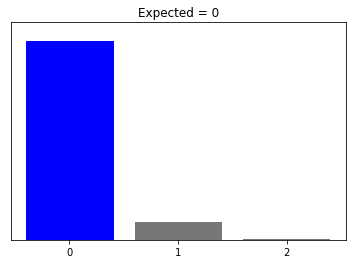

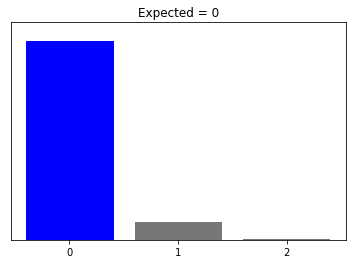

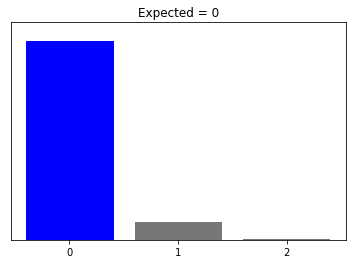

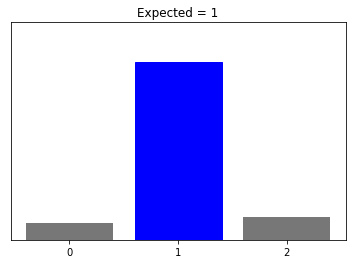

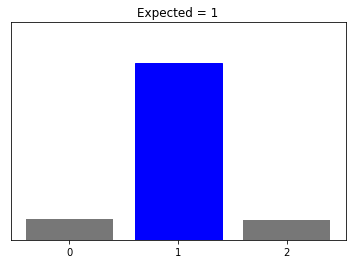

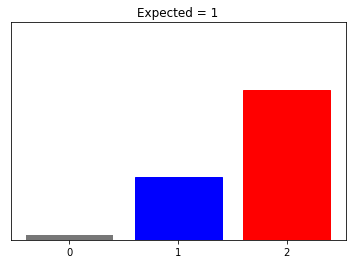

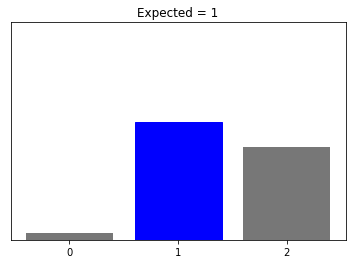

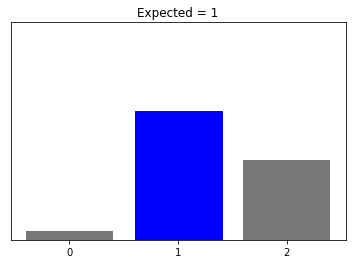

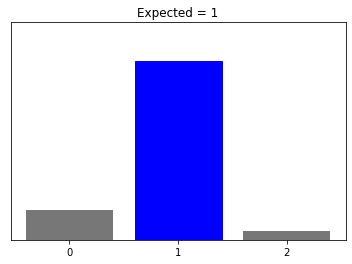

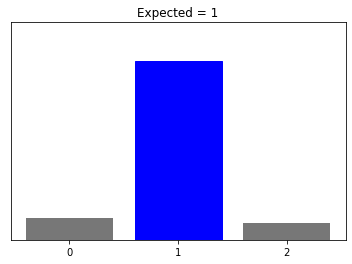

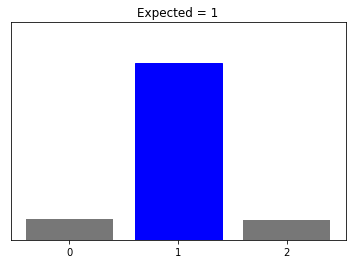

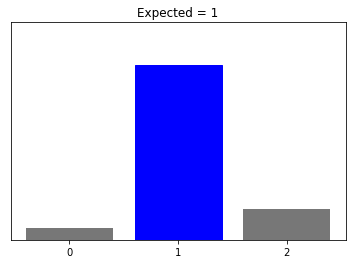

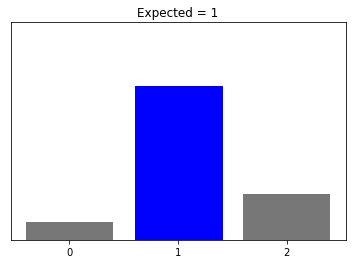

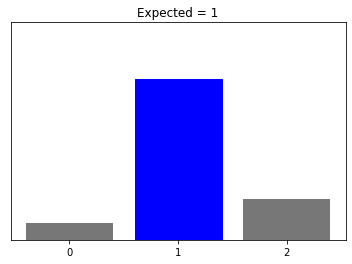

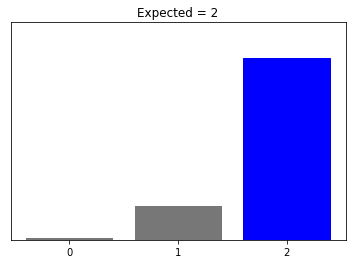

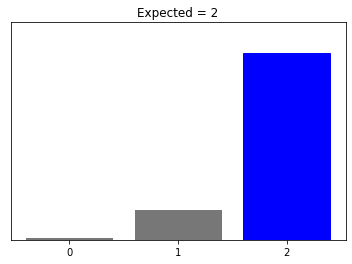

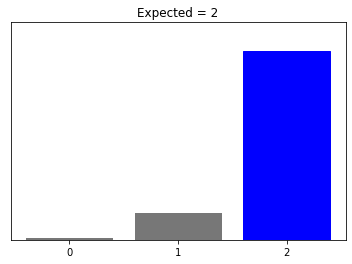

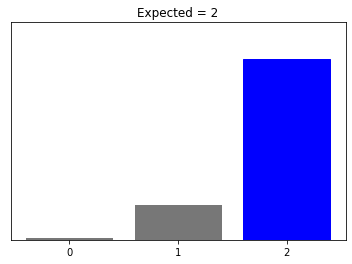

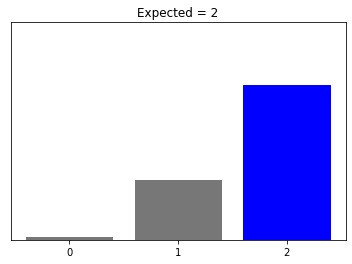

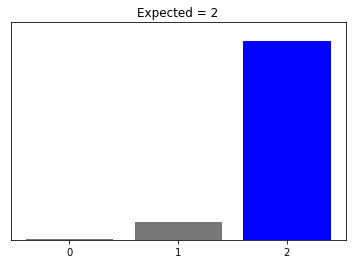

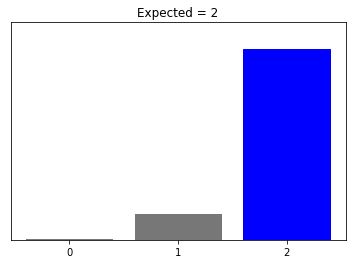

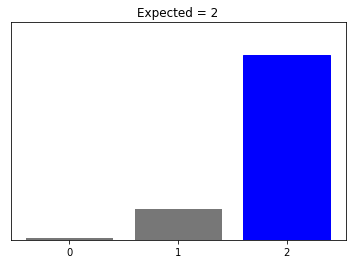

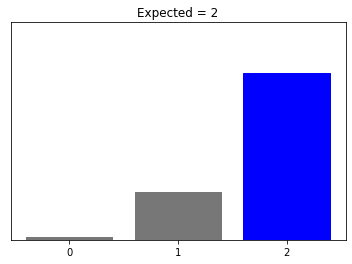

In [731]:
def plot_value_array(i, predictions_array, true_label):
  plt.title('Expected = ' + str(true_label[i]))
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(3))
  plt.yticks([])
  thisplot = plt.bar(range(3), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  plt.show()

i = 0
tl = np.array(test_labels)
num_rows, num_cols = predictions.shape
while i < num_rows:
  plot_value_array(i, predictions[i],  tl)
  i = i + 1

In [732]:
i = 0
num_rows, num_cols = predictions.shape
from decimal import getcontext, Decimal
getcontext().prec = 3
while i < num_rows:
  msg = "\033[1;31;40m WRONG! \033[0m"
  if(tl[i] == np.argmax(predictions[i])):
        msg = "\033[1;32;40m CORRECT! \033[0m"
  print(str(i) + ': Predicted ' + str(np.argmax(predictions[i])) + ' with likelihood ' 
        + "{0:.2f}".format(np.max(predictions[i]) * 100) +
       '%. Expected ' + str(tl[i]) + '. ' + msg) 
  i = i + 1

0: Predicted 0 with likelihood 91.10%. Expected 0.  CORRECT! 
1: Predicted 0 with likelihood 92.76%. Expected 0.  CORRECT! 
2: Predicted 0 with likelihood 92.01%. Expected 0.  CORRECT! 
3: Predicted 0 with likelihood 91.66%. Expected 0.  CORRECT! 
4: Predicted 0 with likelihood 89.98%. Expected 0.  CORRECT! 
5: Predicted 0 with likelihood 90.58%. Expected 0.  CORRECT! 
6: Predicted 0 with likelihood 92.21%. Expected 0.  CORRECT! 
7: Predicted 0 with likelihood 91.52%. Expected 0.  CORRECT! 
8: Predicted 0 with likelihood 91.41%. Expected 0.  CORRECT! 
9: Predicted 0 with likelihood 91.64%. Expected 0.  CORRECT! 
10: Predicted 1 with likelihood 81.89%. Expected 1.  CORRECT! 
11: Predicted 1 with likelihood 81.38%. Expected 1.  CORRECT! 
12: Predicted 2 with likelihood 68.97%. Expected 1.  WRONG! 
13: Predicted 1 with likelihood 54.13%. Expected 1.  CORRECT! 
14: Predicted 1 with likelihood 59.04%. Expected 1.  CORRECT! 
15: Predicted 1 with likelihood 82.23%. Expected 1.  CORRECT! 
16: 

In [733]:
# since model was created with normalized data, must do cross val with normalized data as well
datax = data.drop('class', axis=1)
norm_data = (datax - datax.describe().transpose()['mean']) / datax.describe().transpose()['std']
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
nn_wrapper = KerasClassifier(build_fn=build_model, 
                                 epochs=EPOCHS,  
                                 verbose=0)
#nn_norm_score = cross_val_score(neural_network, norm_data, actual, cv=5)
nn_score = cross_val_score(neural_network, datax, actual, cv=5)
#print(nn_norm_score)
#print(np.mean(nn_norm_score))
print(nn_score)
print(np.mean(nn_score))

[1.         1.         0.83333331 1.         0.80000001]
0.9266666650772095
